In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/pubg-finish-placement-prediction/train_V2.csv')

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
# shape of the data
df.shape

(4446966, 29)

In [5]:
#some info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [7]:
# checking for null values
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

That's a pretty much of a clean data.

# **Visualization of some attributes.**

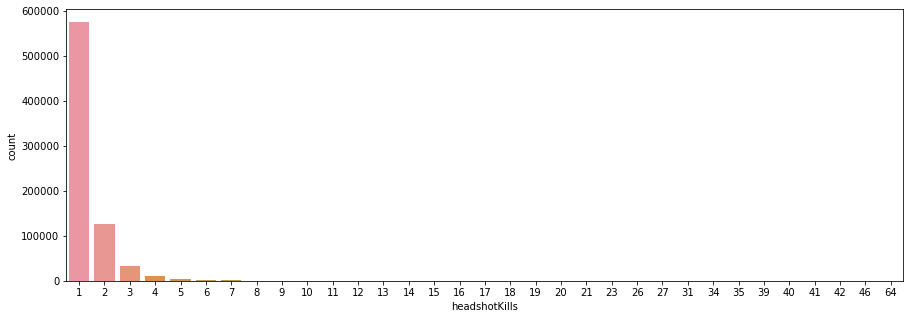

In [8]:
headshot_kill = df[df['headshotKills']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshot_kill['headshotKills'].sort_values())

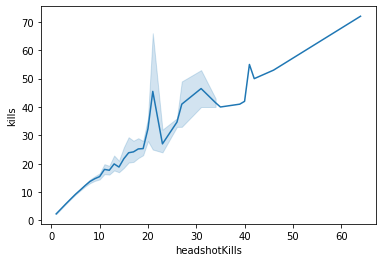

In [9]:
new_df=df[df['kills']>0]
new_df=new_df[new_df['headshotKills']>0]
sns.lineplot(x='headshotKills', y='kills', data=new_df)

obvious conclusion for the relation of the headshots and kills during the gameplay.

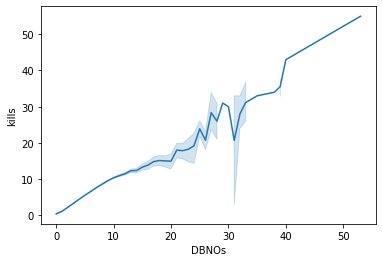

In [10]:
sns.lineplot(x='DBNOs', y='kills', data=df)

obvious variation. We all try to kill the enemy whom we had knocked out. But sometimes their team members revives them, so similarly for such cases we will be having damage dealt higher even if the number of kills is lower

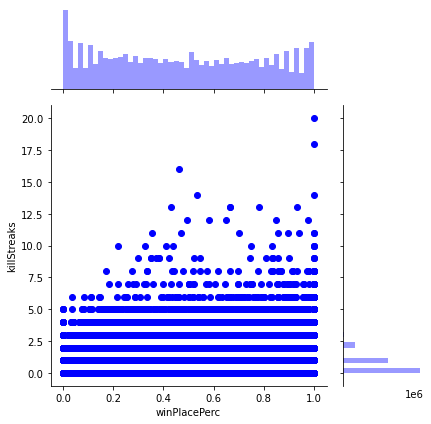

In [11]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=df, ratio=3, color='b', )
plt.show()

here we can see that teams or players with high kill streaks have a good chance for bagging the chicken dinner.

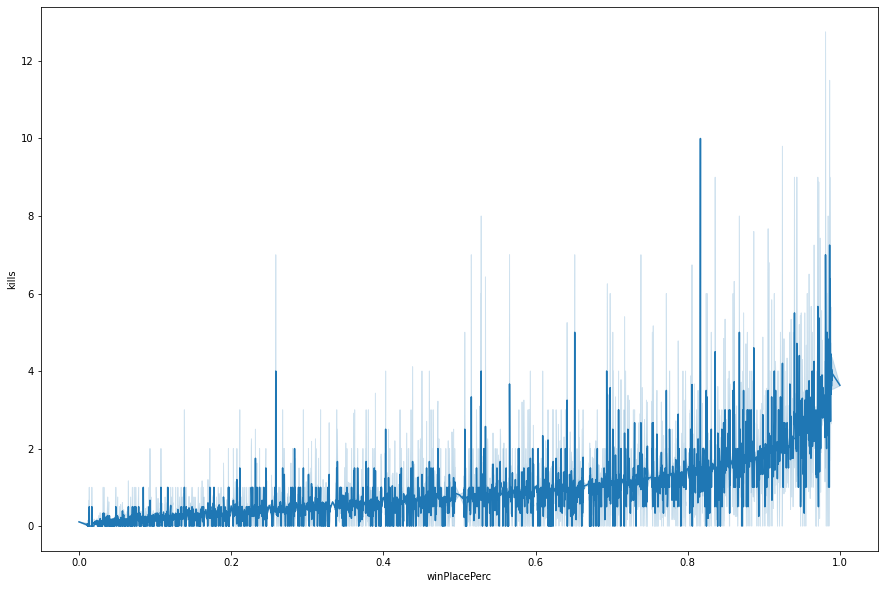

In [12]:
plt.figure(figsize=(15,10))
sns.lineplot(x='winPlacePerc', y='kills', data=df)

variation of kills and winplacepercent. I shows variation across the teams too who  have low winplaceperc. but the graphs looks good ;)

In [13]:
xy=df[df['winPlacePerc']==1]
xy=xy[xy['damageDealt']<1000]
xy

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
67,22252be49d4419,37fa7583da2fa2,1ce1cb998f75c7,1,5,378.80,2,3,6,4,...,0,317.7,0,0.00,0,1,3120.0,4,0,1.0
107,7970b4ea89e81e,abf9e2780b9f48,04832cfd74ff30,1,1,58.36,0,0,2,38,...,0,5134.0,0,0.00,0,0,2708.0,7,0,1.0
118,953577684b828a,54ce33c41ef9ff,c5d412db6dbee4,2,6,76.11,0,0,12,45,...,1,0.0,0,0.00,0,0,2635.0,7,0,1.0
123,174c758156bcf3,a935604c9bb7aa,edc87c8d445823,1,9,626.20,4,3,2,4,...,0,1045.0,0,0.00,0,0,2814.0,7,1566,1.0
186,eb7a3e9f50eca5,fe3d74f737cd10,92338c2233be1a,0,5,778.00,0,3,2,2,...,0,0.0,0,0.00,0,0,2422.0,5,1506,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446846,7fa83fe797d3c9,2b3e8b4c88730e,841d12ab0cf4c0,0,3,567.60,0,2,1,1,...,0,0.0,0,92.31,0,0,3103.0,4,1500,1.0
4446851,94821d018a4c96,de5a790796b4e9,56c24019494299,1,6,886.30,5,2,3,2,...,2,2216.0,0,0.00,0,0,3857.0,11,0,1.0
4446878,b4a03144c7f292,af465c2d950f4b,32eb0143ac4c6f,0,2,100.00,1,0,1,20,...,0,0.0,0,0.00,0,0,2416.0,5,0,1.0
4446896,150f2e129ede6b,4417126d5b0d71,8dddf0ace87e54,0,5,129.40,1,0,0,13,...,1,0.0,0,0.00,0,0,3320.0,3,0,1.0


here this dataset shows that there are many teams who have dealt less damage even less than 1000 still their winplaceperc is 1. And some players with damage dealt with even lower than a single person that is less than 100. Which may shows that the whole game they just might kpt running only too the safe zones or they just kept hidding until the last enemy team is left, which maay be considered as a tactic but not a fairplay. XD

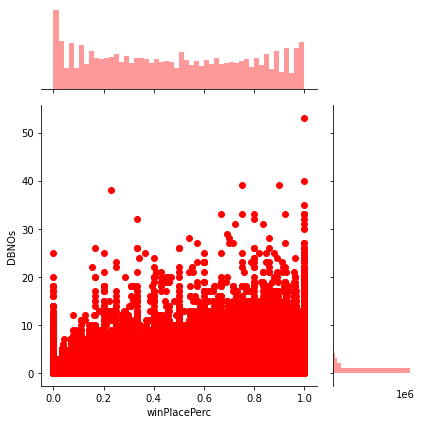

In [14]:
sns.jointplot(x='winPlacePerc', y='DBNOs', data=df, ratio=3, color='r')
plt.show()

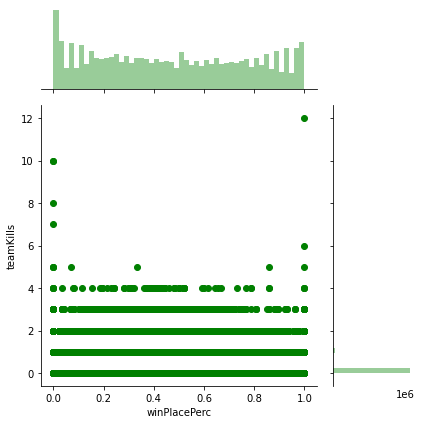

In [15]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=df, ratio=3, color='g')

here the comparison between the team kills and winplaceperc we can see sometimes the team/solo players who kills many team but they also gget killed because of exxcitement and barging at a full speed. Here the most variation can be seen at the most 2 exxtreme ends

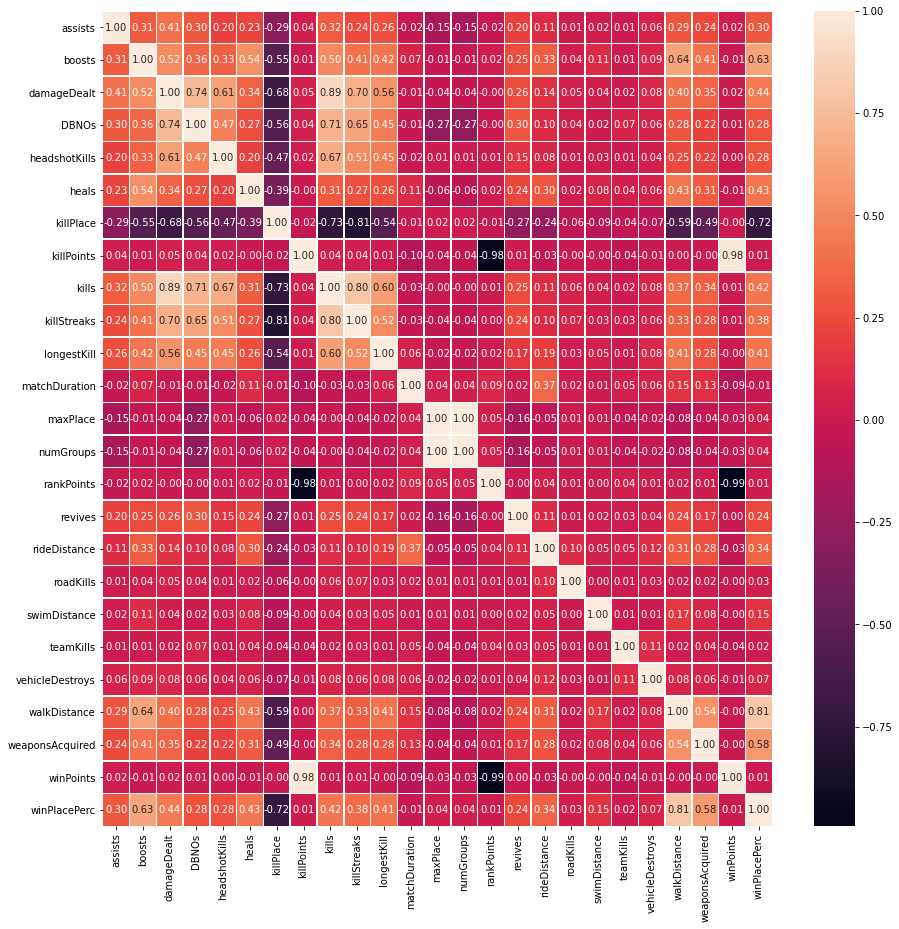

In [16]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

In [17]:
# Reduce the usage of memory
# Ref: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

def reduce_mem_usage(df):
    '''
    iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
    '''
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

## Feature Engineering

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
import numpy as np
import gc, sys

def feature_engineering(is_train=True,debug=True):
    test_idx = None
    if is_train: 
        print("processing train.csv")
        if debug == True:
            df = pd.read_csv('../input/pubg-finish-placement-prediction/train_V2.csv', nrows=10000)
        else:
            df = pd.read_csv('../input/pubg-finish-placement-prediction/train_V2.csv')           

        df = df[df['maxPlace'] > 1]
    else:
        print("processing test.csv")
        df = pd.read_csv('../input/pubg-finish-placement-prediction/test_V2.csv')
        test_idx = df.Id
    
    df = reduce_mem_usage(df)
    
    print("remove some columns")
    target = 'winPlacePerc'
    features = list(df.columns)
    features.remove("Id")
    features.remove("matchId")
    features.remove("groupId")
    features.remove("matchType")  
    
    y = None
    
    
    if is_train: 
        print("get target")
        y = np.array(df.groupby(['matchId','groupId'])[target].agg('mean'), dtype=np.float64)
        features.remove(target)

    print("get group mean feature")
    agg = df.groupby(['matchId','groupId'])[features].agg('mean')
    agg_rank = agg.groupby('matchId')[features].rank(pct=True).reset_index()
    
    if is_train: df_out = agg.reset_index()[['matchId','groupId']]
    else: df_out = df[['matchId','groupId']]

    df_out = df_out.merge(agg.reset_index(), suffixes=["", ""], how='left', on=['matchId', 'groupId'])
    df_out = df_out.merge(agg_rank, suffixes=["_mean", "_mean_rank"], how='left', on=['matchId', 'groupId'])

    print("get group max feature")
    agg = df.groupby(['matchId','groupId'])[features].agg('max')
    agg_rank = agg.groupby('matchId')[features].rank(pct=True).reset_index()
    df_out = df_out.merge(agg.reset_index(), suffixes=["", ""], how='left', on=['matchId', 'groupId'])
    df_out = df_out.merge(agg_rank, suffixes=["_max", "_max_rank"], how='left', on=['matchId', 'groupId'])
    
    print("get group min feature")
    agg = df.groupby(['matchId','groupId'])[features].agg('min')
    agg_rank = agg.groupby('matchId')[features].rank(pct=True).reset_index()
    df_out = df_out.merge(agg.reset_index(), suffixes=["", ""], how='left', on=['matchId', 'groupId'])
    df_out = df_out.merge(agg_rank, suffixes=["_min", "_min_rank"], how='left', on=['matchId', 'groupId'])
    
    print("get group size feature")
    agg = df.groupby(['matchId','groupId']).size().reset_index(name='group_size')
    df_out = df_out.merge(agg, how='left', on=['matchId', 'groupId'])
    
    print("get match mean feature")
    agg = df.groupby(['matchId'])[features].agg('mean').reset_index()
    df_out = df_out.merge(agg, suffixes=["", "_match_mean"], how='left', on=['matchId'])
    
    print("get match size feature")
    agg = df.groupby(['matchId']).size().reset_index(name='match_size')
    df_out = df_out.merge(agg, how='left', on=['matchId'])
    
    df_out.drop(["matchId", "groupId"], axis=1, inplace=True)

    X = df_out
    
    feature_names = list(df_out.columns)

    del df, df_out, agg, agg_rank
    gc.collect()

    return X, y, feature_names, test_idx

In [20]:
X_train, y_train, train_columns, _ = feature_engineering(True,False)
X_test, y, _ , test_idx = feature_engineering(False,True)

processing train.csv
Memory usage of dataframe is 1017.83 MB
Memory usage after optimization is: 322.31 MB
Decreased by 68.3%
remove some columns
get target
get group mean feature
get group max feature
get group min feature
get group size feature
get match mean feature
get match size feature
processing test.csv
Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 121.74 MB
Decreased by 70.5%
remove some columns
get group mean feature
get group max feature
get group min feature
get group size feature
get match mean feature
get match size feature


## Model Building

In [21]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression(n_jobs=4, normalize=True)
LR_model.fit(X_train,y_train)

LinearRegression(n_jobs=4, normalize=True)

In [22]:
LR_model.score(X_train,y_train)

0.9491651007040001

In [23]:
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

In [24]:
y_pred_test.shape

(1934174,)

In [25]:
df_test = reduce_mem_usage(pd.read_csv('../input/pubg-finish-placement-prediction/test_V2.csv'))
df_test.shape

Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 121.74 MB
Decreased by 70.5%


(1934174, 28)

## Submit prediction for testing data

In [26]:
y_pred_test[y_pred_test>1] = 1
y_pred_test[y_pred_test<0] = 0

df_test['winPlacePerc'] = y_pred_test
submission = df_test[['Id', 'winPlacePerc']]
submission.to_csv('submission.csv', index=False)